In [1]:
# Import libraries:

import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from subprocess import check_output

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
# Código utilizado para obtener los datos de la base de datos:

'''
print(check_output(["ls", "../project-statistical-analysis"]).decode("utf8"))

# Conectar con la base de datos:
conn = sqlite3.connect('../project-statistical-analysis/database.sqlite')

# Extraer datos de la base de datos:
df = pd.read_sql_query("SELECT * FROM BoardGames", conn)
'''

# Exportamos el dataframe en formato csv:
'''
df.to_csv('boardgames.csv', index = False)
'''

"\ndf.to_csv('boardgames.csv', index = False)\n"

In [4]:
# Leemos el csv exportado:

df = pd.read_csv('boardgames.csv', low_memory=False)
df.shape

(90400, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 81 columns):
row_names                                   90400 non-null int64
game.id                                     90400 non-null int64
game.type                                   90400 non-null object
details.description                         90373 non-null object
details.image                               83508 non-null object
details.maxplayers                          90397 non-null float64
details.maxplaytime                         90397 non-null float64
details.minage                              90397 non-null float64
details.minplayers                          90397 non-null float64
details.minplaytime                         90397 non-null float64
details.name                                90400 non-null object
details.playingtime                         90397 non-null float64
details.thumbnail                           83508 non-null object
details.yearpublished        

In [6]:
pd.set_option('display.max_columns', None) #print all cols
df.head(3)

,row_names,game.id,game.type,details.description,details.image,details.maxplayers,details.maxplaytime,details.minage,details.minplayers,details.minplaytime,details.name,details.playingtime,details.thumbnail,details.yearpublished,attributes.boardgameartist,attributes.boardgamecategory,attributes.boardgamecompilation,attributes.boardgamedesigner,attributes.boardgameexpansion,attributes.boardgamefamily,attributes.boardgameimplementation,attributes.boardgameintegration,attributes.boardgamemechanic,attributes.boardgamepublisher,attributes.total,stats.average,stats.averageweight,stats.bayesaverage,stats.family.abstracts.bayesaverage,stats.family.abstracts.pos,stats.family.cgs.bayesaverage,stats.family.cgs.pos,stats.family.childrensgames.bayesaverage,stats.family.childrensgames.pos,stats.family.familygames.bayesaverage,stats.family.familygames.pos,stats.family.partygames.bayesaverage,stats.family.partygames.pos,stats.family.strategygames.bayesaverage,stats.family.strategygames.pos,stats.family.thematic.bayesaverage,stats.family.thematic.pos,stats.family.wargames.bayesaverage,stats.family.wargames.pos,stats.median,stats.numcomments,stats.numweights,stats.owned,stats.stddev,stats.subtype.boardgame.bayesaverage,stats.subtype.boardgame.pos,stats.trading,stats.usersrated,stats.wanting,stats.wishing,polls.language_dependence,polls.suggested_numplayers.1,polls.suggested_numplayers.10,polls.suggested_numplayers.2,polls.suggested_numplayers.3,polls.suggested_numplayers.4,polls.suggested_numplayers.5,polls.suggested_numplayers.6,polls.suggested_numplayers.7,polls.suggested_numplayers.8,polls.suggested_numplayers.9,polls.suggested_numplayers.Over,polls.suggested_playerage,attributes.t.links.concat.2....,stats.family.amiga.bayesaverage,stats.family.amiga.pos,stats.family.arcade.bayesaverage,stats.family.arcade.pos,stats.family.atarist.bayesaverage,stats.family.atarist.pos,stats.family.commodore64.bayesaverage,stats.family.commodore64.pos,stats.subtype.rpgitem.bayesaverage,stats.subtype.rpgitem.pos,stats.subtype.videogame.bayesaverage,stats.subtype.videogame.pos
0,1,1,boardgame,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5.0,240.0,14.0,3.0,240.0,Die Macher,240.0,//cf.geekdo-images.com/images/pic159509_t.jpg,1986.0,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line",NaN,NaN,"Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",6.0,7.66508,4.3477,7.29168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.39570,85.0,NaN,NaN,NaN,NaN,0.0,1763.0,719.0,5251.0,1.59321,7.29168,147.0,170.0,4498.0,505.0,1654.0,No,NotRecommended,NaN,NotRecommended,NotRecommended,Recommended,Best,NaN,NaN,NaN,NaN,NotRecommended,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,boardgame,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4.0,30.0,12.0,3.0,30.0,Dragonmaster,30.0,//cf.geekdo-images.com/images/pic184174_t.jpg,1981.0,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,"Indulgence,Coup d'etat",NaN,Trick-taking,"E.S. Lowe,Milton Bradley",7.0,6.60815,1.9423,5.87150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.91318,1066.0,NaN,NaN,NaN,NaN,0.0,273.0,52.0,1053.0,1.46282,5.87150,2541.0,73.0,478.0,67.0,161.0,Some,NotRecommended,NaN,NotRecommended,Recommended,Best,NaN,NaN,NaN,NaN,NaN,NotRecommended,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,boardgame,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4.0,60.0,10.0,2.0,30.0,Samurai,60.0,//cf.geekdo-images.com/images/pic3211873_t.jpg,1998.0,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...",NaN,NaN,"Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",6.0,7.44119,2.5085,7.28295,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [7]:
df = df[['details.name', 'game.type', 'stats.average',
         'stats.averageweight', 'details.yearpublished', 'details.minplayers',
         'details.maxplayers', 'details.minage', 'details.minplaytime',
         'details.maxplaytime', 'attributes.boardgamecategory',
         'stats.numweights', 'stats.owned','stats.usersrated']]                   

In [8]:
# Los registros pueden ser de juego o expansión, queremos eliminar las expansiones:

df['game.type'].value_counts()

boardgame             76688
boardgameexpansion    13712
Name: game.type, dtype: int64

In [9]:
# Limpiamos del dataframe posibles errores como años negativos,
# o registros con muy pocas valoraciones, entre otros:

df = df[(df['game.type'] == 'boardgame') & (df['stats.usersrated'] >= 5) & 
        (df['details.minplayers'] >= 1) & (df['details.maxplayers'] >= 1) & 
        (df['details.minplaytime'] >= 1) & (df['details.maxplaytime'] >= 1) & 
        (df['stats.owned'] >= 5) & (df['details.yearpublished'] >= 0 ) &
        (df['details.minage'] <= 18)]

df['game.type'].value_counts()

boardgame    25781
Name: game.type, dtype: int64

In [10]:
# Ya no necesitamos la columna game.type porqué todo son boardgame:

df = df.drop('game.type', axis=1)
df.shape

(25781, 13)

In [11]:
# Renombramos columnas:

df.columns = ['name', 'rating', 'difficulty', 'year', 'min_players',
             'max_players', 'min_age', 'min_playtime', 'max_playtime',
             'category', 'num_weights', 'owners', 'users_rated']

df.head()

,name,rating,difficulty,year,min_players,max_players,min_age,min_playtime,max_playtime,category,num_weights,owners,users_rated
0,Die Macher,7.66508,4.3477,1986.0,3.0,5.0,14.0,240.0,240.0,"Economic,Negotiation,Political",719.0,5251.0,4498.0
1,Dragonmaster,6.60815,1.9423,1981.0,3.0,4.0,12.0,30.0,30.0,"Card Game,Fantasy",52.0,1053.0,478.0
2,Samurai,7.44119,2.5085,1998.0,2.0,4.0,10.0,30.0,60.0,"Abstract Strategy,Medieval",1355.0,11870.0,12019.0
3,Tal der Könige,6.60675,2.6667,1992.0,2.0,4.0,12.0,60.0,60.0,Ancient,30.0,523.0,314.0
4,Acquire,7.35830,2.5089,1964.0,3.0,6.0,12.0,90.0,90.0,Economic,1515.0,18682.0,15195.0


In [12]:
df.describe()

,rating,difficulty,year,min_players,max_players,min_age,min_playtime,max_playtime,num_weights,owners,users_rated
count,25781.000000,25781.000000,25781.000000,25781.000000,25781.000000,25781.000000,25781.000000,25781.000000,25781.000000,25781.000000,25781.00000
mean,6.071835,1.680428,1955.349094,2.066173,5.443466,8.625926,67.889027,76.049959,31.787246,590.323339,372.67220
std,1.075021,1.011199,297.018702,0.682802,14.785126,4.084059,419.928727,444.072867,157.606201,2579.974414,1906.48797
min,1.277780,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,5.000000,5.00000
25%,5.420000,1.000000,1993.000000,2.000000,3.000000,7.000000,20.000000,20.000000,1.000000,26.000000,11.00000
50%,6.144830,1.666700,2006.000000,2.000000,4.000000,10.000000,30.000000,45.000000,4.000000,76.000000,31.00000
75%,6.814290,2.333300,2012.000000,2.000000,6.000000,12.000000,60.000000,90.000000,13.000000,296.000000,124.00000
max,9.800000,5.000000,2018.000000,15.000000,1000.000000,18.000000,60000.000000,60000.000000,6448.000000,95401.000000,67655.00000


In [13]:
# Normalización de datos :

'''
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_norm = df
for i in [i for i in df_norm.columns if df_norm[i].dtype in numerics]:
    df_norm[i] = ((df_norm[i]-df_norm[i].min())/
                  (df_norm[i].max()-df_norm[i].min())).round(2)
                  
df_describe()
'''

"\nnumerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']\n\ndf_norm = df\nfor i in [i for i in df_norm.columns if df_norm[i].dtype in numerics]:\n    df_norm[i] = ((df_norm[i]-df_norm[i].min())/\n                  (df_norm[i].max()-df_norm[i].min())).round(2)\n                  \ndf_describe()\n"

In [14]:
sns.set(rc={'figure.figsize':(13,7)}) # Seaborn settings
sns.set_style('white')
sns.set_context('poster')

Text(0.5, 1.0, 'Board Games Distribution by Year (1960 - 2017)')

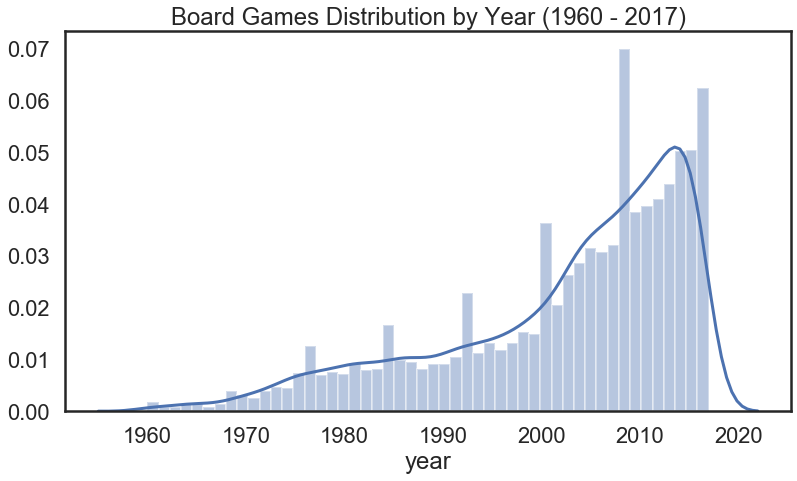

In [15]:
# Histograma Juegos de mesa por año:

df1 = df[(df['year'] >= 1960) & (df['year']<=2017)] # Set year range

sns.distplot(df1['year'])
plt.title("Board Games Distribution by Year (1960 - 2017)")

In [16]:
# Mostramos los juegos más vendidos y su rating:

df[['name', 'owners', 'rating']].sort_values('owners', ascending=False)[:10].round(2)

,name,owners,rating
12,Catan,95401.0,7.27
733,Carcassonne,92508.0,7.44
28197,Pandemic,88935.0,7.67
33497,Dominion,72002.0,7.70
45264,7 Wonders,66328.0,7.84
59833,Love Letter,60198.0,7.32
8456,Ticket to Ride,59892.0,7.48
28859,Agricola,58016.0,8.06
37734,Small World,54589.0,7.36
2763,Puerto Rico,54393.0,8.09


In [17]:
# Mostramos los juegos más valorados:

df[['name', 'rating', 'owners']].sort_values('rating', ascending=False)[:10].round(2)

,name,rating,owners
69988,British Vs Pirates,9.80,15.0
85779,Fantasy Chesslords,9.70,6.0
85780,ONMYOJI: Spirit War,9.57,11.0
90277,Ciudad de Cartón,9.50,5.0
89292,Tournament at Camelot,9.41,7.0
88932,CO-OP: the co-op game,9.40,14.0
88938,Age of Towers,9.38,21.0
88845,HEXplore It: The Valley of the Dead King,9.35,18.0
75227,Meeple Quest,9.35,5.0
80093,Mythic Battles: Pantheon,9.34,265.0


In [18]:
# Mostramos los juegos menos valorados:

df[['name', 'rating', 'owners']].sort_values('rating')[:10].round(2)

,name,rating,owners
17836,Rock Paper Scissors Game,1.28,8.0
11533,Ultimate Quest,1.33,8.0
26034,Intelligent Design vs. Evolution,1.38,7.0
56590,The Vampire Diaries,1.40,29.0
17500,Buck Fever Challenge,1.50,5.0
16613,BreaKey,1.56,15.0
17037,Black Magic Ritual Kit,1.60,13.0
59305,Reguły Gry,1.67,9.0
19493,Kong: Skull Island Game,1.70,40.0
18663,Incarceration,1.73,23.0


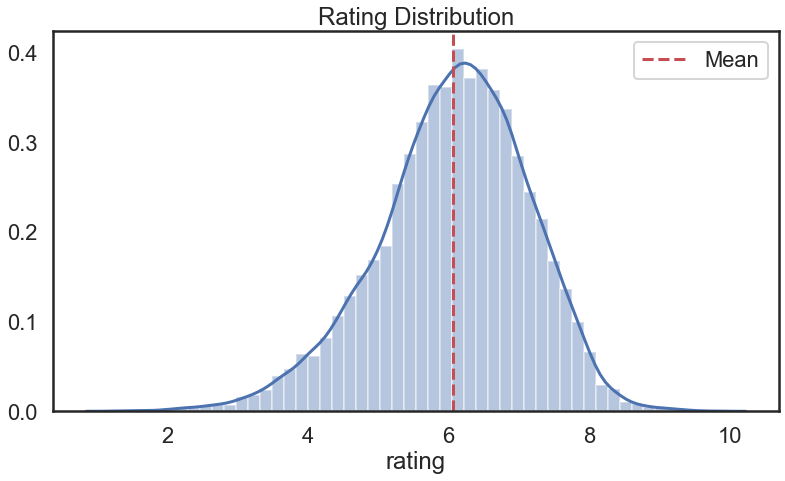

In [19]:
# Distribución del rating:

mean=df['rating'].mean()

f, ax_hist = plt.subplots()
sns.distplot(df["rating"], ax=ax_hist)
plt.title("Rating Distribution")
ax_hist.axvline(mean, color='r', linestyle='--')
plt.legend({'Mean':mean})
plt.show()

In [20]:
# La media del rating:

print(f'ratings mean: {mean}')

ratings mean: 6.071835048291363


In [21]:
# Ajustamos más el análisis seleccionando registros con 30 o más valoraciones:

df = df[df['users_rated']>=30]
df.shape

(13105, 13)

In [22]:
# Matriz de correlaciones:

corr = df.corr().round(3)
corr

,rating,difficulty,year,min_players,max_players,min_age,min_playtime,max_playtime,num_weights,owners,users_rated
rating,1.000,0.492,0.066,-0.100,-0.023,0.200,0.039,0.061,0.187,0.213,0.204
difficulty,0.492,1.000,0.034,-0.148,-0.068,0.328,0.140,0.163,0.112,0.090,0.086
year,0.066,0.034,1.000,-0.012,-0.000,0.071,0.004,0.005,0.013,0.023,0.018
min_players,-0.100,-0.148,-0.012,1.000,0.079,0.034,0.059,0.050,0.002,-0.007,0.002
max_players,-0.023,-0.068,-0.000,0.079,1.000,-0.006,-0.005,-0.004,-0.004,-0.002,-0.002
min_age,0.200,0.328,0.071,0.034,-0.006,1.000,0.039,0.046,0.069,0.084,0.073
min_playtime,0.039,0.140,0.004,0.059,-0.005,0.039,1.000,0.954,-0.001,-0.006,-0.007
max_playtime,0.061,0.163,0.005,0.050,-0.004,0.046,0.954,1.000,0.003,-0.002,-0.004
num_weights,0.187,0.112,0.013,0.002,-0.004,0.069,-0.001,0.003,1.000,0.917,0.954
owners,0.213,0.090,0.023,-0.007,-0.002,0.084,-0.006,-0.002,0.917,1.000,0.985


In [23]:
# Correlaciones del rating:

corr['rating'].sort_values(ascending=False)

rating          1.000
difficulty      0.492
owners          0.213
users_rated     0.204
min_age         0.200
num_weights     0.187
year            0.066
max_playtime    0.061
min_playtime    0.039
max_players    -0.023
min_players    -0.100
Name: rating, dtype: float64

Text(0.5, 1, 'Correlations')

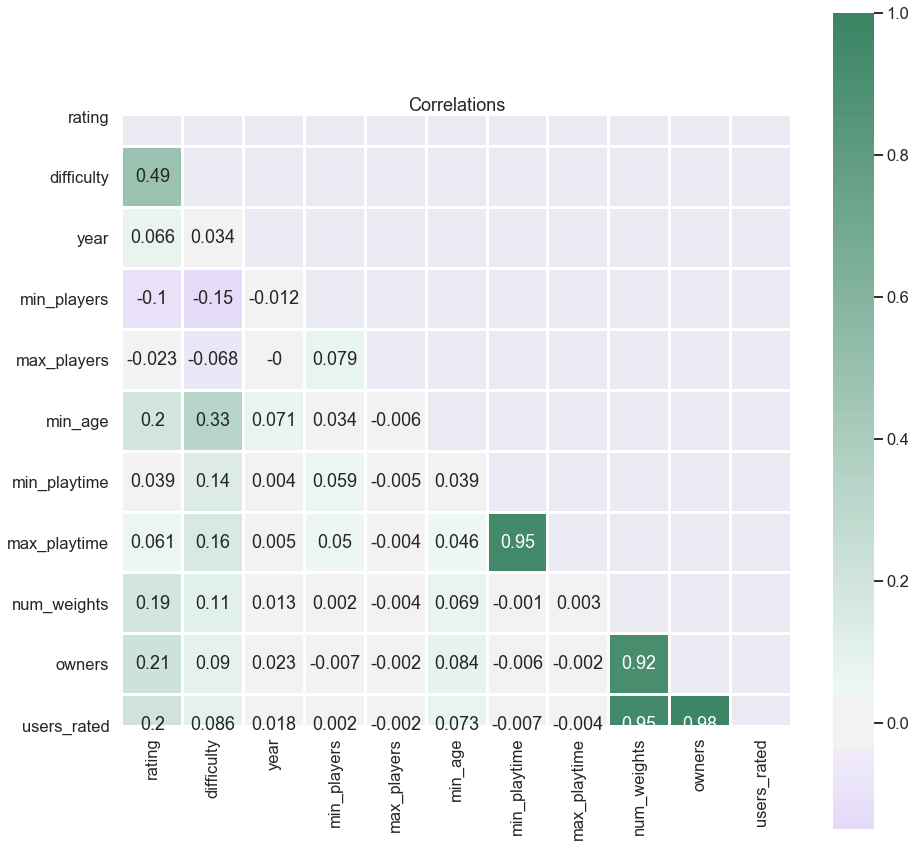

In [24]:
# Heatmap:

sns.set(rc={'figure.figsize':(15,15)})
sns.set_context('talk')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(275, 150, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=2, annot=True)
plt.title("Correlations")

In [25]:
sns.set(rc={'figure.figsize':(15,9)}) #Seaborn settings
sns.set_style('white')
sns.set_context('poster')

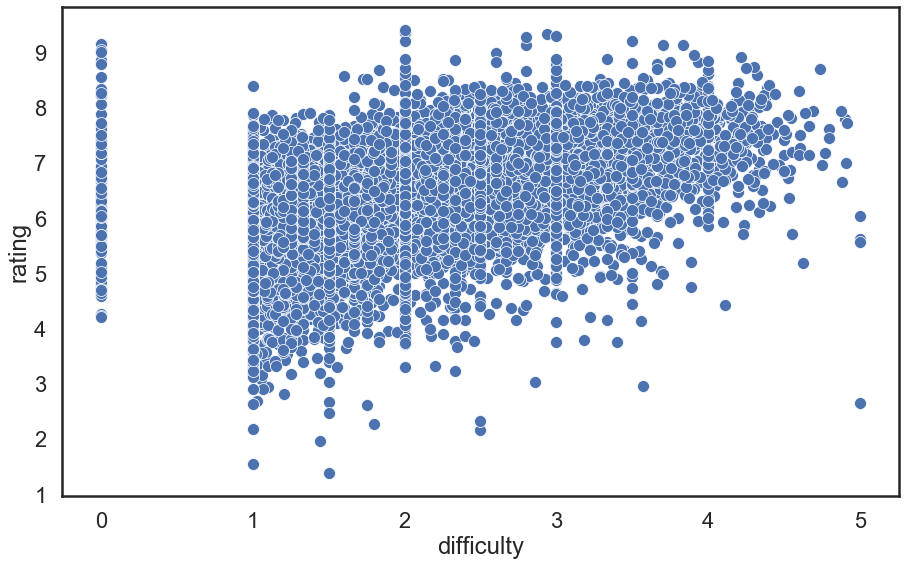

In [26]:
# Gráfico de dispersión de rating y dificultad:

sns.scatterplot(df['difficulty'], df['rating'])

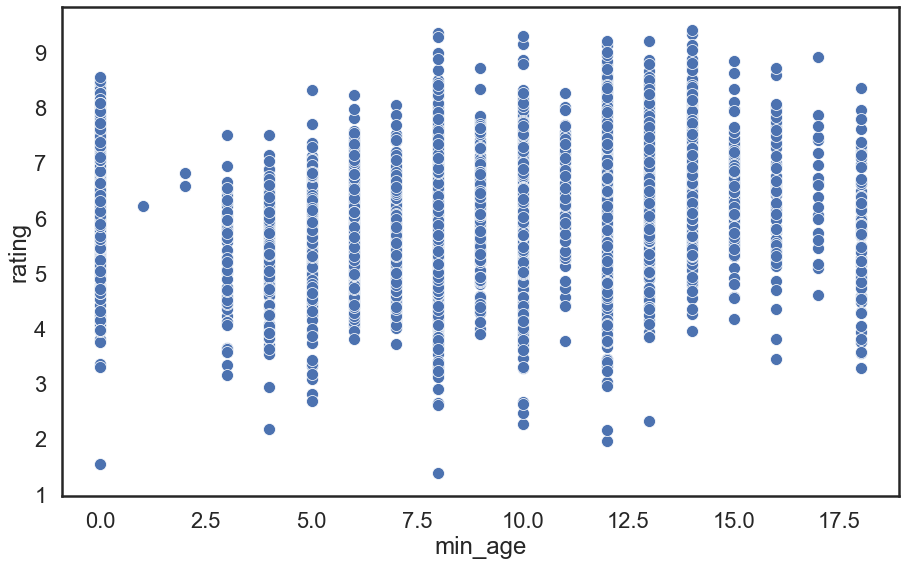

In [27]:
# Gráfico de dispersión de rating y edad mínima:

sns.scatterplot(df['min_age'], df['rating'])

In [28]:
df.columns

Index(['name', 'rating', 'difficulty', 'year', 'min_players', 'max_players',
       'min_age', 'min_playtime', 'max_playtime', 'category', 'num_weights',
       'owners', 'users_rated'],
      dtype='object')

In [29]:
# Hacemos un nuevo dataframe para poder categorizar los diferentes juegos:

# Dataframe con nombre y categoría:

df_cat = df.loc[:, ['name','category']]
df_cat['category'] = df_cat['category'].fillna("None")
df_cat.head()

,name,category
0,Die Macher,"Economic,Negotiation,Political"
1,Dragonmaster,"Card Game,Fantasy"
2,Samurai,"Abstract Strategy,Medieval"
3,Tal der Könige,Ancient
4,Acquire,Economic


In [30]:
# Separamos el contenido de la columna category:

df_cat = df_cat['category'].apply(lambda x: pd.Series(x.split(',')))
df_cat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Economic,Negotiation,Political,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Card Game,Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abstract Strategy,Medieval,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ancient,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Economic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Sumamos las filas para determinar la categoría con más registros:

cat_count = df_cat.apply(pd.Series.value_counts).fillna(0)
cat_count['Total'] = cat_count.sum(axis=1)
cat_count.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Total
Abstract Strategy,998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,998.0
Action / Dexterity,634,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,660.0
Adventure,644,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,666.0
Age of Reason,101,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0
American Civil War,167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167.0


In [32]:
# Obtenemos las categorías con más registros:

cat_count = cat_count.sort_values(by='Total', ascending=False)
cat_list = cat_count[cat_count['Total']>100].index.tolist()

In [33]:
# Generamos dummies para todas las categorías del dataframe:

df['category'].fillna(0, inplace=True)
for i in cat_list:
    df.loc[df['category'].str.contains(i) == True ,i] = 1
    df.loc[df['category'].str.contains(i) == False ,i] = 0
    df[i].fillna(0, inplace=True)
    
ls =[]
for i in cat_list:
    score = df[df[i]==1]['rating'].mean()
    ls.append({'category': i, 'rating': score})
df_catmean = pd.DataFrame(ls).sort_values(by='rating', ascending=False)

In [34]:
# TOP 10 mejores categorías:

df_catmean.head(10)

,category,rating
19,Miniatures,7.026640
42,Civilization,6.912351
63,Age of Reason,6.910297
45,Napoleonic,6.873570
53,World War I,6.807002
10,World War II,6.794023
40,Trains,6.786573
29,City Building,6.758980
48,Renaissance,6.754550
50,American Civil War,6.743596


Text(0.5, 1.0, 'Top 10 rated by Category')

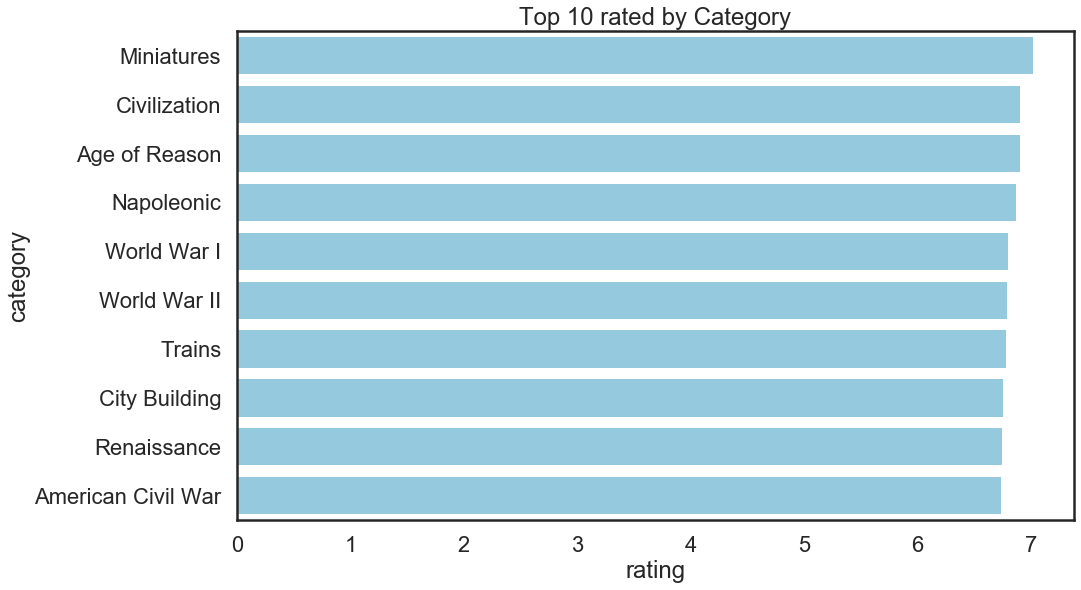

In [35]:
sns.barplot(df_catmean['rating'][:10], df_catmean['category'][:10],
            color='skyblue')
plt.title("Top 10 rated by Category")

In [36]:
# TOP 10 peores categorías:

df_catmean.tail(10)

,category,rating
6,Party Game,5.988899
15,Action / Dexterity,5.941947
35,Word Game,5.897352
64,Number,5.876239
31,Memory,5.769259
58,Electronic,5.763189
17,Movies / TV / Radio theme,5.733147
9,Children's Game,5.628754
27,Trivia,5.567683
60,None,NaN


Text(0.5, 1.0, 'Bottom 10 Rated by Category')

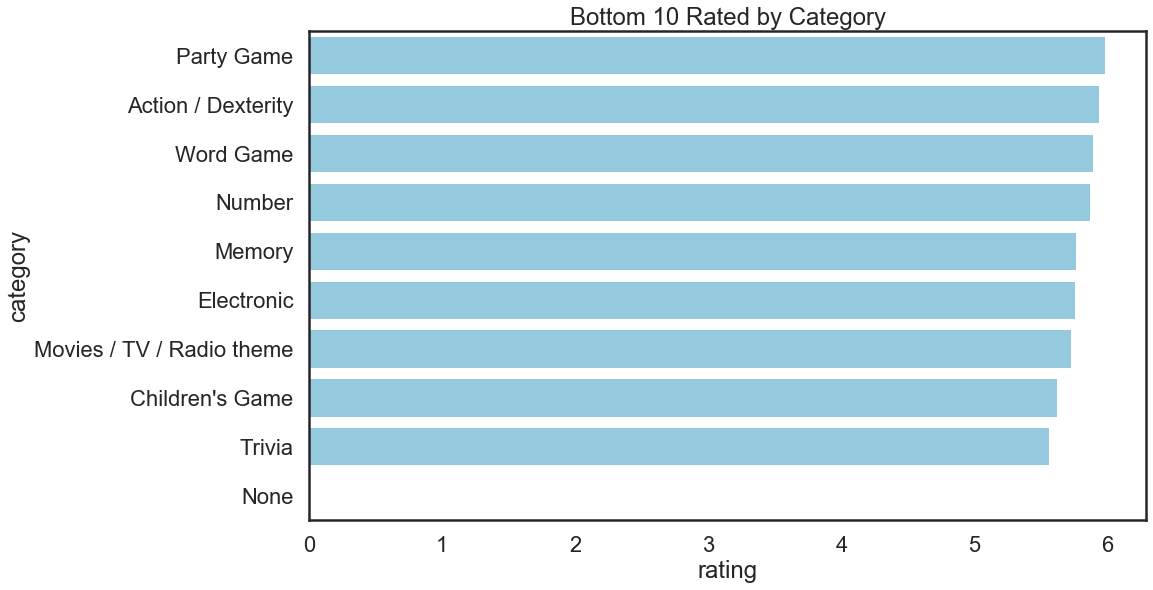

In [37]:
sns.barplot(df_catmean['rating'][-10:], df_catmean['category'][-10:],
            color='skyblue')
plt.title('Bottom 10 Rated by Category')

In [38]:
df.head()

,name,rating,difficulty,year,min_players,max_players,min_age,min_playtime,max_playtime,category,num_weights,owners,users_rated,Card Game,Wargame,Fantasy,Dice,Fighting,Economic,Party Game,Science Fiction,Abstract Strategy,Children's Game,World War II,Bluffing,Animals,Humor,Adventure,Action / Dexterity,Medieval,Movies / TV / Radio theme,Deduction,Miniatures,Exploration,Racing,Ancient,Negotiation,Nautical,Horror,Real-time,Trivia,Political,City Building,Sports,Memory,Print & Play,Territory Building,Novel-based,Word Game,Educational,Transportation,Collectible Components,Puzzle,Trains,Modern Warfare,Civilization,Pirates,Mythology,Napoleonic,Aviation / Flight,Murder/Mystery,Renaissance,Industry / Manufacturing,American Civil War,Comic Book / Strip,Video Game Theme,World War I,American West,Space Exploration,Travel,Zombies,Electronic,Farming,None,Maze,Spies/Secret Agents,Age of Reason,Number
0,Die Macher,7.66508,4.3477,1986.0,3.0,5.0,14.0,240.0,240.0,"Economic,Negotiation,Political",719.0,5251.0,4498.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Dragonmaster,6.60815,1.9423,1981.0,3.0,4.0,12.0,30.0,30.0,"Card Game,Fantasy",52.0,1053.0,478.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Samurai,7.44119,2.5085,1998.0,2.0,4.0,10.0,30.0,60.0,"Abstract Strategy,Medieval",1355.0,11870.0,12019.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Tal der Könige,6.60675,2.6667,1992.0,2.0,4.0,12.0,60.0,60.0,Ancient,30.0,523.0,314.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Acquire,7.35830,2.5089,1964.0,3.0,6.0,12.0,90.0,90.0,Economic,1515.0,18682.0,15195.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df.shape

(13105, 78)

In [40]:
df_miniatures = df[df['Miniatures']==1]

In [41]:
df_miniatures.shape

(526, 78)

In [42]:
df_trivia = df[df['Trivia']==1]

In [43]:
df_trivia.shape

(344, 78)

In [44]:
df_miniatures['rating'].mean()


7.026639543726237

In [45]:
df_trivia['rating'].mean()

5.567683401162786

In [46]:
# T-test:
a = df_miniatures['rating']
b = df_trivia['rating']
stats.ttest_ind(a,b, equal_var=False)  

Ttest_indResult(statistic=24.605540048169473, pvalue=6.424826298694561e-97)

In [47]:
# The p-value is significantly small:
# then we reject the null hypothesis of equal averages.

In [48]:
# Modelo de regresión lineal:
X = sm.add_constant(df[['min_age', 'year']]) 
Y = df['rating']

/Users/plopezbar/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [49]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     291.8
Date:                Sat, 28 Mar 2020   Prob (F-statistic):          1.03e-124
Time:                        21:35:14   Log-Likelihood:                -16846.
No. Observations:               13105   AIC:                         3.370e+04
Df Residuals:                   13102   BIC:                         3.372e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2949      0.091     58.288      0.0

In [50]:
# R-squared: el 0.043 de la variabilidad del rating se debe a min_age y year.

In [51]:
X = sm.add_constant(df['difficulty']) 
Y = df['rating']

In [52]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     4191.
Date:                Sat, 28 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:35:16   Log-Likelihood:                -15313.
No. Observations:               13105   AIC:                         3.063e+04
Df Residuals:                   13103   BIC:                         3.064e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2095      0.018    283.393      0.0

In [53]:
# R-squared: el 0.242 de la variabilidad del rating se debe a difficulty.

In [54]:
# Variables más importantes:

model_data = df.loc[:,('rating', 'min_age', 'min_players',
                       'year', 'category', 'difficulty')]

In [55]:
for i in cat_list:
    model_data.loc[model_data['category'].str.contains(i) == True ,i] = 1
    model_data.loc[model_data['category'].str.contains(i) == False ,i] = 0
    model_data[i].fillna(0, inplace=True)

In [56]:
model_data = model_data.loc[:, model_data.columns != 'category']

In [57]:
model_data.head()

,rating,min_age,min_players,year,difficulty,Card Game,Wargame,Fantasy,Dice,Fighting,Economic,Party Game,Science Fiction,Abstract Strategy,Children's Game,World War II,Bluffing,Animals,Humor,Adventure,Action / Dexterity,Medieval,Movies / TV / Radio theme,Deduction,Miniatures,Exploration,Racing,Ancient,Negotiation,Nautical,Horror,Real-time,Trivia,Political,City Building,Sports,Memory,Print & Play,Territory Building,Novel-based,Word Game,Educational,Transportation,Collectible Components,Puzzle,Trains,Modern Warfare,Civilization,Pirates,Mythology,Napoleonic,Aviation / Flight,Murder/Mystery,Renaissance,Industry / Manufacturing,American Civil War,Comic Book / Strip,Video Game Theme,World War I,American West,Space Exploration,Travel,Zombies,Electronic,Farming,None,Maze,Spies/Secret Agents,Age of Reason,Number
0,7.66508,14.0,3.0,1986.0,4.3477,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.60815,12.0,3.0,1981.0,1.9423,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.44119,10.0,2.0,1998.0,2.5085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.60675,12.0,2.0,1992.0,2.6667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.35830,12.0,3.0,1964.0,2.5089,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
model_data.shape

(13105, 70)

In [59]:
# Separación Training y Test:

target_name = 'rating'
X = model_data.drop('rating', axis=1)
y=model_data[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=243)

In [60]:
# OLS

lm = LinearRegression()
lm.fit(X_train, y_train)

# Características con mayor peso:

ols_coefficients = pd.DataFrame({'feature': X_train.columns, 'importance': lm.coef_})
ols_coefficients.sort_values('importance', ascending=False)[:10]

,feature,importance
3,difficulty,0.507588
23,Miniatures,0.449396
57,World War I,0.324808
36,Print & Play,0.297719
63,Farming,0.288229
49,Napoleonic,0.274634
67,Age of Reason,0.272745
44,Trains,0.244302
59,Space Exploration,0.223841
10,Party Game,0.193476


In [61]:
'''
ols_y_predict = lm.predict(X_test)
ols_mse = np.sqrt(metrics.mean_squared_error(y_test, ols_y_predict))
ols_mse
'''

'\nols_y_predict = lm.predict(X_test)\nols_mse = np.sqrt(metrics.mean_squared_error(y_test, ols_y_predict))\nols_mse\n'